In [41]:
import numpy as np
import pandas as pd
import os
import io
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

### Stop words 
https://www.geeksforgeeks.org/removing-stop-words-nltk-python/ <br>
NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages.

In [42]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

Initialising a empty dictonary

In [43]:
 dic={}

### this function gets input of a file and breaks it into line and words
we traverse through each word in words list and check <br>
1. if it is not a stop word after converting it into lower as our stop words list contains everything om lower case
2. check if it is an alphabet only
3. we create a dictonry with non stop_words by storing the word as key and its freq as the value

In [44]:
def ReadFile(file) :
    line = file.read()
    words = line.split()
    c=0
    for r in words:
        if not r.lower() in stop_words and r.isalpha():
            #appendFile = open('filteredtext.txt','a')
            #appendFile.write(" "+r)
            #appendFile.close()
            if(r in dic) :
                prev_freq = dic.get(r)
                prev_freq+=1
                dic[r] = prev_freq
            else :
                dic[r]=1

### File handling
fetching the folders and then openingeach file in sub folders and sending it to ReadFile function

In [45]:
groups = os.scandir('20_newsgroups/')
for group in groups :
    documents = os.scandir(group)
    for doc in documents :
        file = open(doc,'r')
        ReadFile(file)

### Checking the count of total words fetched

In [46]:
len(dic.keys())

88087

### Sorting the dictonary in desending order

In [47]:
sorted_dic = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1],reverse=True)}
sorted_dic

{'Apr': 19568,
 'GMT': 17684,
 'would': 15022,
 'article': 11968,
 'one': 11417,
 'like': 9091,
 'get': 8061,
 'University': 8048,
 'people': 8009,
 'know': 7591,
 'think': 7052,
 'use': 6019,
 'X': 5856,
 'also': 5704,
 'could': 5350,
 'even': 4732,
 'may': 4705,
 'make': 4674,
 'good': 4656,
 'see': 4372,
 'much': 4372,
 'many': 4281,
 'two': 4184,
 'time': 4175,
 'want': 3999,
 'say': 3978,
 'way': 3677,
 'used': 3653,
 'new': 3632,
 'need': 3594,
 'first': 3548,
 'anyone': 3491,
 'really': 3348,
 'believe': 3264,
 'going': 3170,
 'still': 3156,
 'something': 3082,
 'find': 3080,
 'right': 3064,
 'might': 3049,
 'said': 3037,
 'world': 3014,
 'take': 2923,
 'go': 2905,
 'using': 2832,
 'must': 2727,
 'back': 2690,
 'never': 2667,
 'since': 2636,
 'us': 2625,
 'work': 2607,
 'got': 2585,
 'without': 2578,
 'last': 2558,
 'made': 2489,
 'God': 2466,
 'system': 2457,
 'better': 2442,
 'someone': 2426,
 'problem': 2398,
 'May': 2365,
 'New': 2351,
 'well': 2340,
 'read': 2301,
 'things'

### Creating a list to plot graph which has the position of each word in dictonary
word_pos_dic stores the key as words and value is the index at which that word is stored in the final 2d array like <br>
we have to create the features as all the words so i have given a index to each word that index i stored in this dic

In [78]:
import seaborn as sns
word_pos = []
word_pos_dic = {}
i=1
for key in sorted_dic.keys() :
    word_pos_dic[key] = i
    i+=1
word_pos_dic

{'Apr': 1,
 'GMT': 2,
 'would': 3,
 'article': 4,
 'one': 5,
 'like': 6,
 'get': 7,
 'University': 8,
 'people': 9,
 'know': 10,
 'think': 11,
 'use': 12,
 'X': 13,
 'also': 14,
 'could': 15,
 'even': 16,
 'may': 17,
 'make': 18,
 'good': 19,
 'see': 20,
 'much': 21,
 'many': 22,
 'two': 23,
 'time': 24,
 'want': 25,
 'say': 26,
 'way': 27,
 'used': 28,
 'new': 29,
 'need': 30,
 'first': 31,
 'anyone': 32,
 'really': 33,
 'believe': 34,
 'going': 35,
 'still': 36,
 'something': 37,
 'find': 38,
 'right': 39,
 'might': 40,
 'said': 41,
 'world': 42,
 'take': 43,
 'go': 44,
 'using': 45,
 'must': 46,
 'back': 47,
 'never': 48,
 'since': 49,
 'us': 50,
 'work': 51,
 'got': 52,
 'without': 53,
 'last': 54,
 'made': 55,
 'God': 56,
 'system': 57,
 'better': 58,
 'someone': 59,
 'problem': 60,
 'May': 61,
 'New': 62,
 'well': 63,
 'read': 64,
 'things': 65,
 'sure': 66,
 'come': 67,
 'number': 68,
 'point': 69,
 'little': 70,
 'Computer': 71,
 'government': 72,
 'give': 73,
 'part': 74,
 'an

### Plotting the graph between the freq count and pos of the word in the dictonay

<AxesSubplot:>

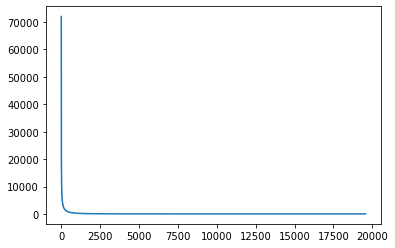

In [49]:
sns.lineplot(y=word_pos,x=list(sorted_dic.values()))

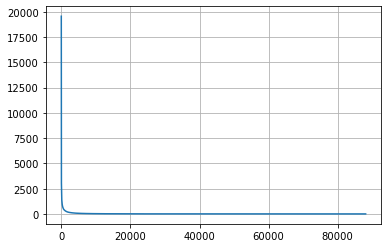

In [50]:
import matplotlib.pyplot as plt
plt.plot(word_pos, list(sorted_dic.values()))
plt.grid()
plt.show()

# -------------------------------Creating 2d list--------------------------------------

### Initialising a 2d array of 20 rows for 20 groups and column size equal to the dic of words or vocab
plus one in dic size as 0th row has labels 
https://www.geeksforgeeks.org/python-using-2d-arrays-lists-the-right-way/

In [89]:
rows, cols = (21, len(sorted_dic.keys())+1)
arr = [[0]*cols]*rows
np.shape(arr)

(21, 88088)

In [91]:
k=0
for key in sorted_dic.keys() :
    arr[0][k] = key
    k+=1

### this function takes a file and the index of the group to which it belongs and it updates the freq of words in 2d array

In [101]:
def AddInto2DArray(file,i) :
    line = file.read()
    words = line.split()
    for word in words:
        if word in sorted_dic :
            arr[i][word_pos_dic[word]] = arr[i][word_pos_dic[word]] + 1 
            
    

### file handling and sending the group id along with file
group_id_dic below stores the id of each group in 2d array <br>
as first row means alt.atheism that is arr[0] = arr[alt.atheism]

In [108]:
groups = os.scandir('20_newsgroups/')
group_id_dic  = {}
k=1
for group in groups :
    documents = os.scandir(group)
    group_id_dic[os.path.basename(group)]=k
    for files in documents :
        file = open(doc,'r')
        AddInto2DArray(file,k)
    k+=1

        
    

In [125]:
c=0
for i in arr[4] :
    if isinstance(i,int ):
        c+=1
c

37